In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


### Initialize your cluster centers

In [31]:
def initialize_clusters(dat, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data
    
    Args:
        data: shape = (N, d). original data. 
        k: integer number. predefined number of clusters for the k-means algorithm. 
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    center_indices = np.random.choice(dat.shape[0], k)
    print(len(center_indices))
    print(len(dat))
    centers = dat[center_indices, :]
    return centers
mu = initialize_clusters(data, 3)
mu

3
272


array([[ 4.633, 82.   ],
       [ 4.8  , 82.   ],
       [ 3.567, 73.   ]])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [12]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.
    
    Args:
        data: numpy array of shape = (N, d). original data. 
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,  
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    N, k = data.shape[0], mu.shape[0]
    distances = np.ndarray((N, k))
    for i in range(N):
        for j in range(k):
            distances[i, j] = np.linalg.norm(data[i,:] - mu[j,:])**2
    return distances
build_distance_matrix(data, mu)

array([[4.40068900e+00, 1.67225000e+01, 2.92422500e+02],
       [7.34919489e+02, 8.48022500e+02, 6.40025000e+01],
       [4.98100000e+01, 8.22476890e+01, 1.46505889e+02],
       [3.64802500e+02, 4.45695889e+02, 2.84089000e-01],
       [1.60900000e+01, 4.00688900e+00, 5.36745089e+02],
       [6.77822500e+02, 7.86455489e+02, 5.02836890e+01],
       [4.92180890e+01, 2.50625000e+01, 6.84702500e+02],
       [1.64006890e+01, 4.72250000e+00, 5.32422500e+02],
       [9.05212089e+02, 1.03025000e+03, 1.21040000e+02],
       [1.60136890e+01, 4.01000000e+00, 5.35760000e+02],
       [7.34760000e+02, 8.47848689e+02, 6.40068890e+01],
       [9.09985600e+00, 1.28408900e+00, 4.88695889e+02],
       [9.00108900e+00, 2.50625000e+01, 2.62002500e+02],
       [1.16216529e+03, 1.30329000e+03, 2.25000000e+02],
       [4.21808900e+00, 6.25000000e-02, 4.49702500e+02],
       [8.45268356e+02, 9.66212089e+02, 1.00173889e+02],
       [3.67165289e+02, 4.48290000e+02, 0.00000000e+00],
       [9.32148900e+00, 1.12250

#### Update k-means parameters

In [23]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to, 
            then update the parameter cluster centers.
    
    Args:
        data:   numpy array of shape = (N, d). original data. 
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    # find clusters
    distances = build_distance_matrix(data, mu_old)
    assignments = np.argmin(distances, axis=1)
   
    k = mu_old.shape[0]
    mu_new = np.ndarray(mu_old.shape)
    for j in range(k):
        mu_new[j,:] = np.mean(data[assignments == j,:], axis=0)
        
    losses = np.min(distances, axis=1)
    return losses, assignments, mu_new
update_kmeans_parameters(data, mu)

(array([4.40068900e+00, 6.40025000e+01, 4.98100000e+01, 2.84089000e-01,
        4.00688900e+00, 5.02836890e+01, 2.50625000e+01, 4.72250000e+00,
        1.21040000e+02, 4.01000000e+00, 6.40068890e+01, 1.28408900e+00,
        9.00108900e+00, 2.25000000e+02, 6.25000000e-02, 1.00173889e+02,
        0.00000000e+00, 1.12250000e+00, 1.00022500e+02, 4.00028900e+00,
        1.21002500e+02, 2.25000000e+02, 9.61308900e+00, 5.07344890e+01,
        4.90900000e+01, 7.22500000e-01, 4.90470890e+01, 2.50225000e+01,
        9.14668900e+00, 4.04000000e+00, 6.40044890e+01, 1.60547560e+01,
        1.86146890e+01, 1.04000000e+00, 4.91600000e+01, 1.00071289e+02,
        1.96013689e+02, 1.36000000e+00, 9.00688900e+00, 4.91108890e+01,
        1.01368900e+00, 1.60176890e+01, 1.01368900e+00, 1.60000000e+01,
        6.40900000e+01, 1.28368900e+00, 8.33888900e+00, 8.11225000e+01,
        1.03348900e+00, 9.06250000e+00, 3.63214890e+01, 4.90707560e+01,
        6.40068890e+01, 1.36000000e+00, 6.40002890e+01, 1.874890

#### Play with k-means

The current iteration of k-means is: 0,                    the average loss is 131.22305640441178.


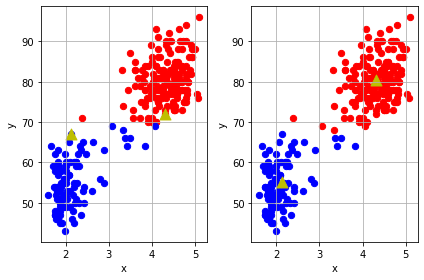

The current iteration of k-means is: 1,                    the average loss is 32.81512971023837.


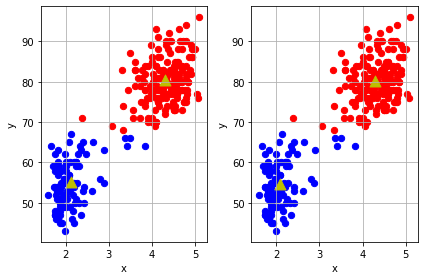

The current iteration of k-means is: 2,                    the average loss is 32.72709088583533.


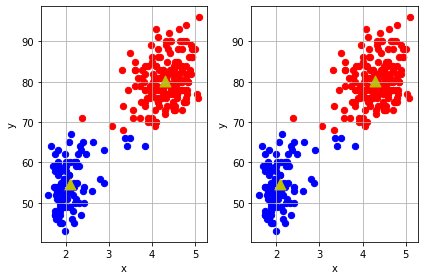

The current iteration of k-means is: 3,                    the average loss is 32.72709088583533.


In [24]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold, verbose = True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print("The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(i=iteration, l=average_loss))
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

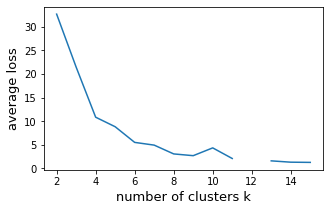

In [25]:
# don't worry about empty slice warnings
import warnings
warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose = False)
    losses += [average_loss]
plt.figure(figsize = (5, 3))
plt.xlabel('number of clusters k', fontsize = 13)
plt.ylabel('average loss', fontsize = 13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [38]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [39]:
def preprocess_image(original_image):
    """preprocess the image. 
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!** 
    
    Args: 
        original_image: numpy array of shape (480, 480, 3) 
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    return np.reshape(original_image, (480*480, 3))

processed_image = preprocess_image(original_image)

5
230400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


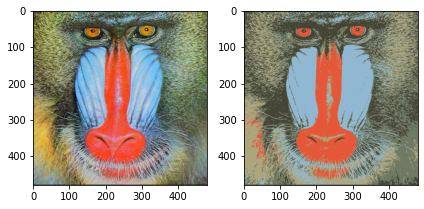

In [43]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args: 
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        print(iteration)
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)
    

# define parameters
k = 5
max_iter = 100
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)